## Mecari model terbaik untuk menganalisa harga mobil

Saat kita ingin membeli sebuah mobil pasti kita melihat fitur apa saja yang dimiliki mobil tersebut, apakah fitur dari mobil yang kita akan beli sesuai dengan harganya. Untuk meningkatkan pengetahuan kita terhadap harga mobil, kali ini saya akan membuat analisis harga mobil sesuai dengan fitur yang dimilikinya, fitur mobil yang akan dianalisis yaitu 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'. akan dilakukan dengan 2 model algoritma yaitu dengan LinearRegression dan Polynomialregression, hasilnya akan dibandingkan mana model yang paling akurat untuk menentukan harga mobil.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(data)

In [3]:
df.to_csv('harga_mobil.csv')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [6]:
# Membuat fungsi untuk visualisasi data
from ipywidgets import interact, interactive, fixed, interact_manual

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Harga')
    plt.ylabel('atribut mobil')

    plt.show()
    plt.close()

In [8]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Data Training')
    plt.plot(xtest, y_test, 'go', label='Data Test')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('harga')
    plt.legend()

In [9]:
y_data = df['price']

In [10]:
x_data = df.drop('price', axis = 1)

In [11]:
# Membagi data ke dalam data testing dan data training
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("jumlah data yang di test :", x_test.shape[0])
print("jumlah data training:",x_train.shape[0])

jumlah data yang di test : 21
jumlah data training: 180


### Analisis dengan LinearRegression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [15]:
ypred_train = model.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
ypred_train[:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [16]:
ypred_test = model.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
ypred_test[:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


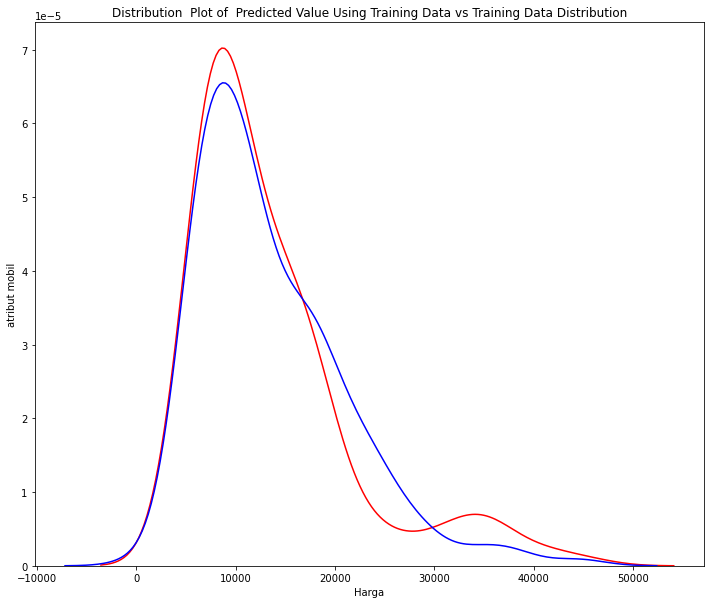

In [18]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, ypred_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


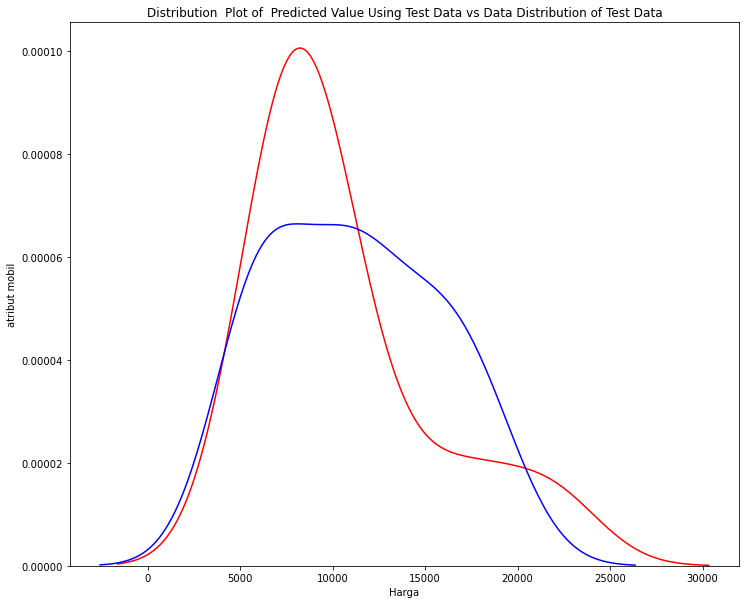

In [19]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,ypred_test,"Actual Values (Test)","Predicted Values (Test)",Title)

### Analisis data dengan PolynomialRegression

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
pr=PolynomialFeatures(degree=2)

In [22]:
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [23]:
x_train_pr.shape

(180, 15)

In [24]:
poly=LinearRegression().fit(x_train_pr,y_train)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


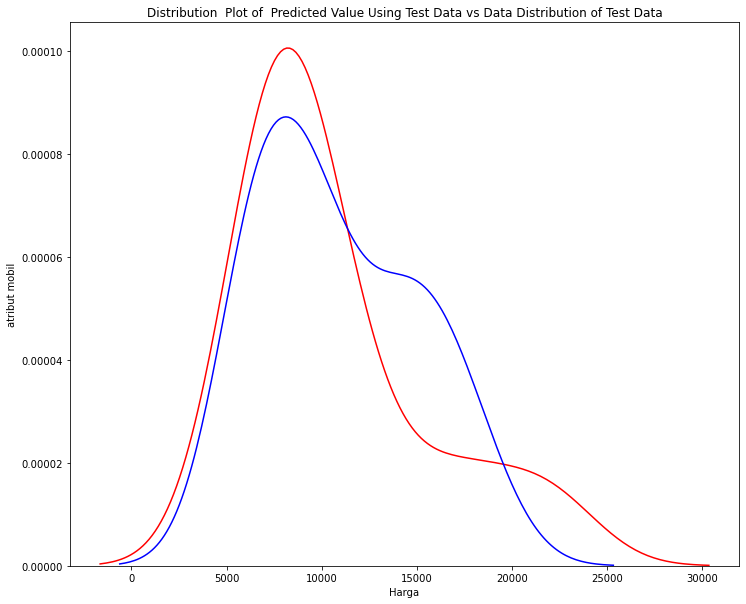

In [25]:
ypred_test1 = poly.predict(x_test_pr)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, ypred_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

### Kesimpulan
 
Pada analisis data dengan LinearRegression, distribusi test data memiliki penyesuaian yang baik terhadap test data, namun memiliki bias yang besar pada harga 5.000 sampai 15.000, Sedangkan PolynomialRegression memiliki penyesuai yang lebih baik karena hanya memiliki bias di harga 13.000 sampai 17.000, sehingga dapat disimpulkan model terbaik untuk mencari harga mobil pada data di atas adalah dengan menggunakan model PolynomialRegression.